In [7]:
import cv2
import numpy as np
    
# 讀取影片
cap = cv2.VideoCapture('WiiPlay.mp4')

# Check if the video file is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open the video file")

# Set start and end time
start_time = 5
end_time = 50 #13
fps = 30
frame_seq = start_time * fps  # Calculate the starting frame
out_size = (640, 360)


# Use X264 encoding
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

def update(x):
    value1 = cv2.getTrackbarPos('threshold1', 'Binary')
    print(value1)

# 建立 VideoWriter 物件，輸出影片至 output.mp4
out = cv2.VideoWriter('output.mp4', fourcc, 30.0, out_size)

# 第一個參數標誌 CAP_PROP_POS_FRAMES 是下一個要解碼/捕獲的幀的從 0 開始的索引。
# 第二個參數定義幀數，範圍從 0 到 (time_length*fps - 1)。
cap.set(cv2.CAP_PROP_POS_FRAMES , frame_seq)                     # 設定開始的時間 frame_seq

cv2.namedWindow('Binary')
cv2.createTrackbar('threshold1', 'Binary', 104, 255, update)
cv2.createTrackbar('threshold2', 'Binary', 115, 255, update) 


# Create a counter for counting frames
counter = start_time * fps
while True:
    ret, frame = cap.read()
    
    # 判斷結束時間
    if ret == False  or counter == end_time* fps:
        break
    else:
        counter += 1 
    
    cur_frame = cv2.resize(frame, out_size, 0, 0, interpolation=cv2.INTER_AREA)
    hsv = cv2.cvtColor(cur_frame, cv2.COLOR_BGR2HSV)
    h = hsv[:,:,0]
    value1 = cv2.getTrackbarPos('threshold1', 'Binary')
    value2 = cv2.getTrackbarPos('threshold2', 'Binary') 
    mask = cv2.inRange(h,value1,value2)
    cur_frame[mask==0]=0
    cv2.imshow('Binary', cur_frame)
    out.write(cur_frame)
    
    c = cv2.waitKey(10)
    if c == 27:
        break
    
cap.release()
out.release()
cv2.destroyAllWindows()

104
104


In [6]:
#double threshold for color range detection

import cv2
import numpy as np

def hMaxCallback(pos):
    pass
def hMinCallback(pos):
    pass
def sMaxCallback(pos):
    pass
def sMinCallback(pos):
    pass
def vMaxCallback(pos):
    pass
def vMinCallback(pos):
    pass

# 設定開始與結束的時間 01
start_time = 5
end_time = 50 #13
fps = 30
frame_seq = start_time * fps  
out_size = (640, 360)

cv2.namedWindow('Test')
cv2.createTrackbar('HueMin', 'Test',  65,  255, hMinCallback)
cv2.createTrackbar('HueMax', 'Test',  109, 255, hMaxCallback)
cv2.createTrackbar('SatMin', 'Test',  27,  255, sMinCallback)
cv2.createTrackbar('SatMax', 'Test',  246, 255, sMaxCallback)
cv2.createTrackbar('ValMax', 'Test',  106, 255, vMinCallback)
cv2.createTrackbar('ValMin', 'Test',  255, 255, vMaxCallback)

out_size = (480, 270)
cap = cv2.VideoCapture('WiiPlay.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES , frame_seq)  
# Check if the video file is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open the video file")

counter = start_time * fps
while True:
    ret, frame = cap.read()
    if ret == False or counter == end_time* fps:
        break
    else:
        counter += 1 
    
    cur_frame = cv2.resize(frame, out_size, 0, 0, interpolation=cv2.INTER_AREA)
    # Use cv2.cvtColor() to convert images from BGR to HSV format.
    hsv = cv2.cvtColor(cur_frame, cv2.COLOR_BGR2HSV)
    h = hsv[:,:,0]
    
    hMax = cv2.getTrackbarPos('HueMax','Test')
    hMin = cv2.getTrackbarPos('HueMin','Test')
    hMax = cv2.getTrackbarPos('SatMax','Test')
    hMin = cv2.getTrackbarPos('SatMin','Test')
    hMax = cv2.getTrackbarPos('ValMin','Test')
    hMin = cv2.getTrackbarPos('ValMax','Test')
    
    cv2.imshow('Input', cur_frame)
    
    mask = cv2.inRange(h,value1,value2)
    cur_frame[mask==0]=0
    cv2.imshow('Test', cur_frame)
    
    lower_color = np.array([hMin, 0, 0])
    upper_color = np.array([hMax, 255, 255])
    mask = cv2.inRange(cur_frame, lower_color, upper_color)
    cv2.imshow('Test', mask)

    c = cv2.waitKey(1)
    if c == 32:
        cv2.waitKey()
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

##### %%writefile test
## Midterm
<b>The objective of the first part of the midterm is to detect blue cursor, yellow timer, and human skin from input video. Your output should be similar to midterm_demo.mp4. Please complete steps 1-8 in one single code cell. The whole process can be divided to the following steps:</b>
1. (5pts) Input images from video file WiiPlay.mp4 with the same level number as the last two digits of your student id, and show the images in the "input" window.
2. (5pts) Use <i>cv2.cvtColor()</i> to convert images from BGR to HSV format.
3. (5pts) Use <i>cv2.createTrackbar()</i> to create six trackbars (HueMin, HueMax, SatMin SatMax, ValMin, ValMax), and use <i>cv2.getTrackbarPos()</i> to get the current value of each trackbar.
4. (5pts) Use <i>cv2.threshold()</i> or <i>cv2.inRange()</i> to apply double thresholding to each channel (Hue, Sat, Val) based on current values of the six trackbars
5. (5pts) Apply morphological filters to remove noise (outliers & holes), and show the detected regions in the "test" window..
6. (10pts) Find out the best color range to detect <b>blue cursor</b>, apply these thresholds, and show the detected regions in the "cursor" window.
7. (10pts) Find out the best color range to detect <b>yellow timer</b>, apply these thresholds, and show the detected regions in the "timer" window.
8. (10pts) Find out the best color range to detect <b>human skin</b>, apply these thresholds, and show the detected regions in the "skin" window.

<b>The objective of the second part of the midterm is to stitch images together. Your output should be similar to the following picture. The coordinates of four pairs of corresponding points between two consecutive images should be provided <b style="color:red;">manually</b> (don't match automatically). Please complete steps 9-12 in one single code cell, steps 13-14 in another markdown cell, and upload your Jupyter notebook file (*.ipynb).</b>
9. (5pts) Given a pair of images (pier_1.jpg, pier_2.jpg), use <i>cv2.getPerspectiveTransform()</i> to get Homography Matrix by specifing the coordinates of four pairs of corresponding points <b>manually</b>.
10. (10pts) Use <i>cv2.warpPerspective()</i> and the Homography Matrix to get the projective view of the second image. You might need to make the output image larger enough to fit the projective image.
11. (10pts) Use <i>cv2.add()</i> to stitch two images together.
12. (10pts) Given a set of three images (pier_1.jpg, pier_2.jpg, pier_3.jpg) and their corresponding points, try to stitch them together.
13. (5pts) Any comments regarding the midterm? Which steps you believe you have completed? Which steps bother you?
14. (5pts) Any comments regarding the classes up to now? pace too fast or slow? quiz too hard or simple? prefer C or Python?
 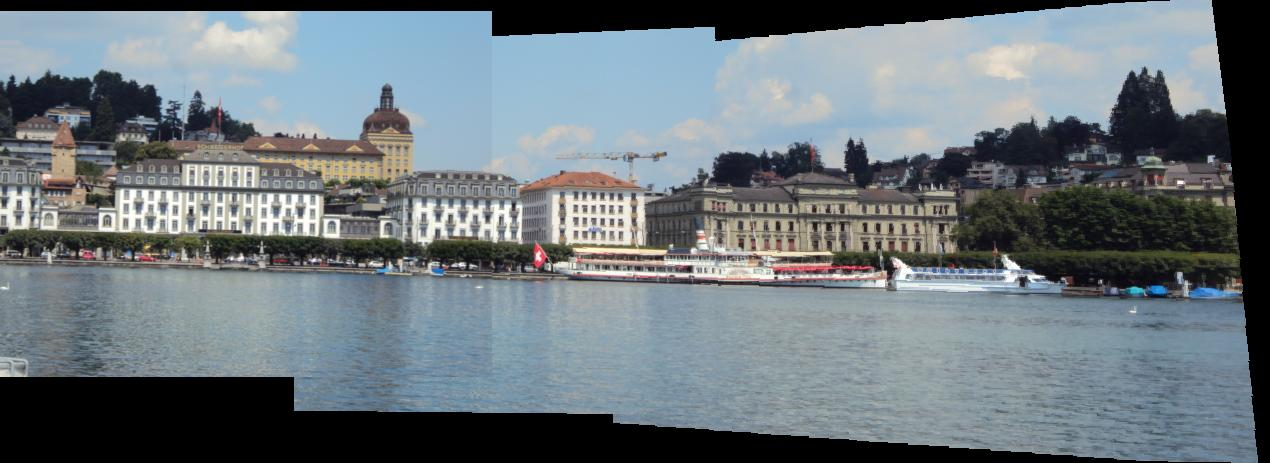